In [ ]:
import pandas as pd

#데이터 로드

최근 파일 로드

In [ ]:
#최근 아파트 분양가 파일 로드
df_last = pd.read_csv("주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding = "cp949", engine = "python")
df_last.shape #데이터 구조 확인(행/열 개수)

(4335, 5)

In [ ]:
df_last.head() #파일 미리보기(위쪽 5개 행)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [ ]:
df_last.tail() #팡리 미리보기(아래쪽 5개 행)

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


#데이터 요약

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


#결측치 처리

결측치
> isnull() 또는 isna() 사용 (결측치가 존재할 경우 True 반환, True == 1)

In [ ]:
df_last.isnull() #결측치 확인

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [ ]:
df_last.isna().sum() #결측치 개수 반환

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

#데이터 타입 변경

*   분양가격의 데이터 타입: object(문자) > 숫자형으로 변경 
*   결측치가 존재하기에, pd.to_numeric() 사용



In [ ]:
#errors = "coerce": 문자가 포함되어 있는 경우는 강제로 'NaN'으 값으로 변환하고, 나머지 숫자로된 문자열은 숫자형으로 변환
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors = "coerce")

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


#평당 분양가격 조회

평당 분양가격 구하기
*   평당분양가격 = 분양가격 * 3.3



In [ ]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3 #데이터프레임 숫자 연산
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


분양가격 요약하기

In [ ]:
#object 타입의 분양가격(㎡) 열 요약
#.describe() : DataFrame의 계산 가능한 값들에 대한 다양한 계산 값을 반환
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [ ]:
#수치 데이터로 변경된 분양가격 열 요약
df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

#규모구분을 전용면적 컬럼으로 변경

기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 변경
str.replace() 

In [ ]:
#규모구분 컬럼 조회
df_last["규모구분"]

0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [ ]:
#.uniqie(): 지정한 행 또는 열에서 중복값을 제외한 유니크한 값만 얻기
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [ ]:
#규모구분 컬럼을 문자열로 변환: df_last["규모구분"].str

In [ ]:
#전용면적, 초과, 이하 문자열 삭제
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")

In [ ]:
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip() #문자열 앞 뒤 공백 제거

In [ ]:
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

#필요 없는 컬럼 제거

.drop()
* 행: axis = 0
* 열: axis = 1

In [ ]:
#제거 전
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [ ]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis = 1)

In [ ]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [ ]:
df_last.info() #제거 후 - 메모리 사용량 감소

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


#집계하기

##groupby 연습(교재)

그룹 객체 만들기(분할 단계)

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age", "sex", "class", "fare", "survived"]]

df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
#1개의 열 "class"를 기준으로 그룹화 
grouped = df.groupby(["class"])
grouped

In [ ]:
#그룹 연산 - 분할
for key, group in grouped:
  print("* key: ", key)
  print("* number: ", len(group))
  print(group.head(), "\n")

#연산메소드 적용
average = grouped.mean()
print(average)

* key:  First
* number:  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1 

* key:  Second
* number:  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1 

* key:  Third
* number:  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0 

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.8776

In [ ]:
#특정 그룹만 선택하기: .get_group("그룹명")
group3 = grouped.get_group("Third") #3등석 데이터만 추출
group3.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0


In [ ]:
#여러 열을 기준으로 그룹화 
grouped_two = df.groupby(["class", "sex"])

for key, group in grouped_two:
  print("* key: ", key)
  print("* number: ", len(group))
  print(group.head(), "\n")

#연산 메소드 적용
average_two = grouped_two.mean()
print(type(average_two))
print(average_two)

* key:  ('First', 'female')
* number:  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1 

* key:  ('First', 'male')
* number:  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0 

* key:  ('Second', 'female')
* number:  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1 

* key:  ('Second', 'male')
* number:  108
     age   sex   class  fare  survived
17   Na

In [ ]:
#개별 그룹 선택하기
group3f = grouped_two.get_group(("Third", "female")) #3등석 여성 데이터만 추출
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


그룹 연산 메소드(적용-결합 단계)

In [ ]:
std_all = grouped.std() #각 그룹 모든 열에 대한 표준편차를 집계, 데이터프레임으로 변한
std_all

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [ ]:
std_fare = grouped.fare.std() #각 그룹에 대한 fare 열의 표준편차 집계, 시리즈로 변환
std_fare

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

## groupby로 데이터 집계하기: 데이터 그룹화 & 연산

In [ ]:
#지역명을 기준으로 분양가격의 평균을 구함
#df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [ ]:
#전용면적을 기준으로 분양가격의 평균 구하기
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [ ]:
#지역명, 전용면적으로 평당분양가격의 평균을 구함 
#.unstack(): 쌓은 것을 옆으로 늘어놓음
#.round(): 옵션 미설정 시 소수 첫째자리에서 반올림
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [ ]:
#연도, 지역명으로 평당분양가격의 평균을 구함
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [ ]:
g.unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


In [ ]:
g.unstack().transpose() #행열 변환

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


##pivor table 연습(교재)

In [ ]:
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_colwidth", 20)

In [ ]:
titanic = sns.load_dataset("titanic")
df = titanic.loc[:, ["age", "sex", "class", "fare", "survived"]]

pdf1 = pd.pivot_table(
    df, #피벗할 데이터프레임
    index = "class", #행 위치에 들어갈 열
    columns = "sex", #열 위치에 들어갈 열
    values = "age", #데이터로 사용할 열
    aggfunc = "mean" #데이터 집계 함수
)

pdf1.head()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [ ]:
#집계 함수를 2개 이상 지정 가능
pdf2 = pd.pivot_table(
    df, #피벗할 데이터프레임
    index = "class", #행 위치에 들어갈 열
    columns = "sex", #열 위치에 들어갈 열
    values = "age", #데이터로 사용할 열
    aggfunc = ["mean", "sum"] #데이터 집계 함수
)

pdf2.head()

mean                sum         
sex        female       male  female     male
class                                        
First   34.611765  41.281386  2942.0  4169.42
Second  28.722973  30.740707  2125.5  3043.33
Third   21.750000  26.507589  2218.5  6706.42

In [ ]:
#행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(
    df, #피벗할 데이터프레임
    index = ["class", "sex"], #행 위치에 들어갈 열
    columns = "survived", #열 위치에 들어갈 열
    values = ["age", "fare"], #데이터로 사용할 열
    aggfunc = ["mean", "sum"] #데이터 집계 함수
)

print(pdf3.head())
print(pdf3.index)
print(pdf3.columns)

                    mean                                        sum           \
                     age                   fare                 age            
survived               0          1           0           1       0        1   
class  sex                                                                     
First  female  25.666667  34.939024  110.604167  105.978159    77.0  2865.00   
       male    44.581967  36.248000   62.894910   74.637320  2719.5  1449.92   
Second female  36.000000  28.080882   18.250000   22.288989   216.0  1909.50   
       male    33.369048  16.022000   19.488965   21.095100  2803.0   240.33   
Third  female  23.818182  19.329787   19.773093   12.464526  1310.0   908.50   

                                     
                    fare             
survived               0          1  
class  sex                           
First  female   331.8125  9644.0125  
       male    4842.9081  3358.6794  
Second female   109.5000  1560.2292  
       male  

## pivot table로 데이터 집계하기
  : 앞의 groupby 작업을 pivot_table로 동일하게 수행

In [ ]:
#지역명을 기준으로 분양가격의 평균을 구함
#df_last.groupby(["지역명"])["평당분양가격"].mean()
pd.pivot_table(df_last, index = ["지역명"], values = ["평당분양가격"], aggfunc = "mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [ ]:
#전용면적을 기준으로 분양가격의 평균 구하기
#df_last.groupby(["전용면적"])["평당분양가격"].mean()
pd.pivot_table(df_last, index = "전용면적", values = "평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [ ]:
#지역명, 전용면적으로 평당분양가격의 평균을 구함 
#df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()
df_last.pivot_table(index = "전용면적", columns = "지역명", values = "평당분양가격").round()

지역명,강원,경기,경남,경북,광주,...,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,...,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,...,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,...,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,...,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,...,7284.0,7293.0,10785.0,7815.0,7219.0


In [ ]:
#연도, 지역명으로 평당분양가격의 평균을 구함
#g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last, index = ["연도", "지역명"], values = "평당분양가격")

In [ ]:
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


#시각화

데이터 시각화를 위한 폰트 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프의 글자를 선명하게 출력하도록 설정 
!apt install fonts-nanum #나눔 글자체 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #나눔고딕 글자체의 전체 경로 설정
font = fm.FontProperties(fname=fontpath).get_name() #글자체의 경로 설정

plt.rc('font', family = 'NanumBarunGothic') #폰트 이름 설정
mpl.font_manager._rebuild() #폰트 업데이트

판다스로 시각화 - 선 그래프, 막대 그래프

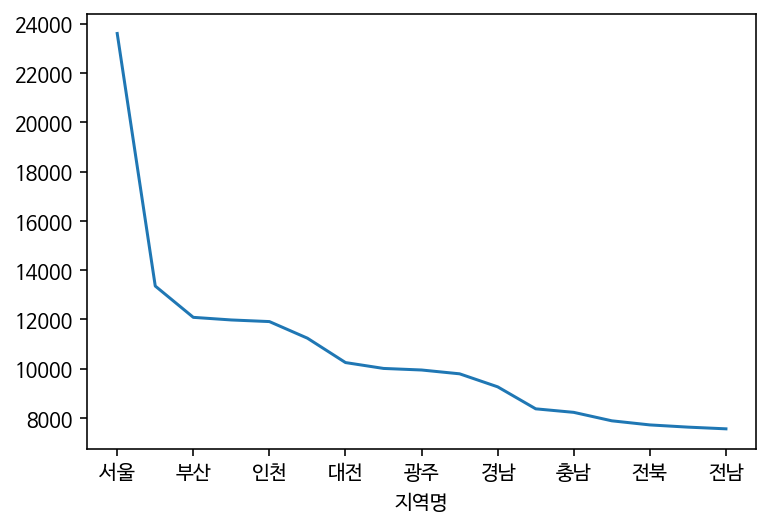

In [ ]:
#지역명으로 분양가격의 평균을 구하고 선 그래프로 시각화
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending = False)
g.plot()

Seaborn으로 시각화


> Seaborn: matplotlib을 기반으로 다양한 색 테마, 차트 기능을 추가한 라이브러리



In [ ]:
import seaborn as sns
%matplotlib inline

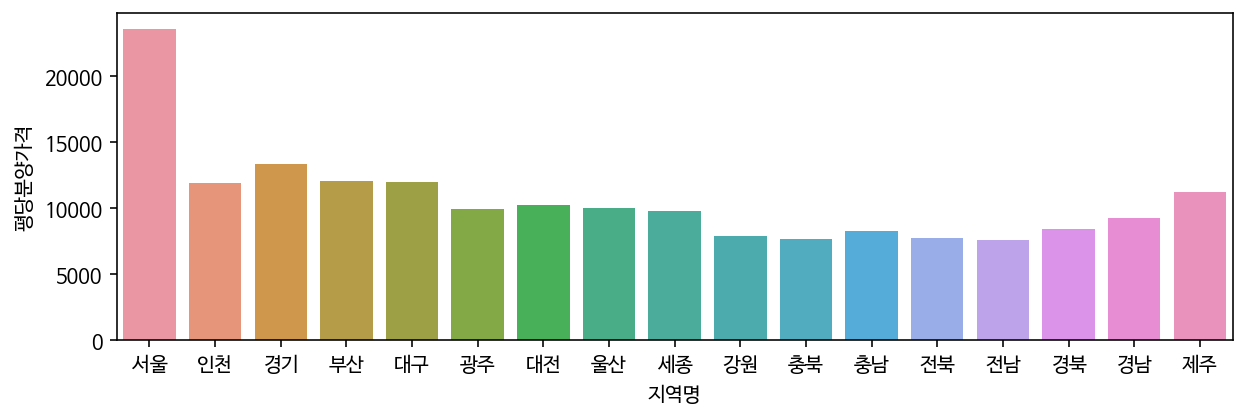

In [ ]:
#지역별 평당분양가격 barplot
plt.figure(figsize = (10, 3))
sns.barplot(data = df_last, x = "지역명", y = "평당분양가격", ci = None)

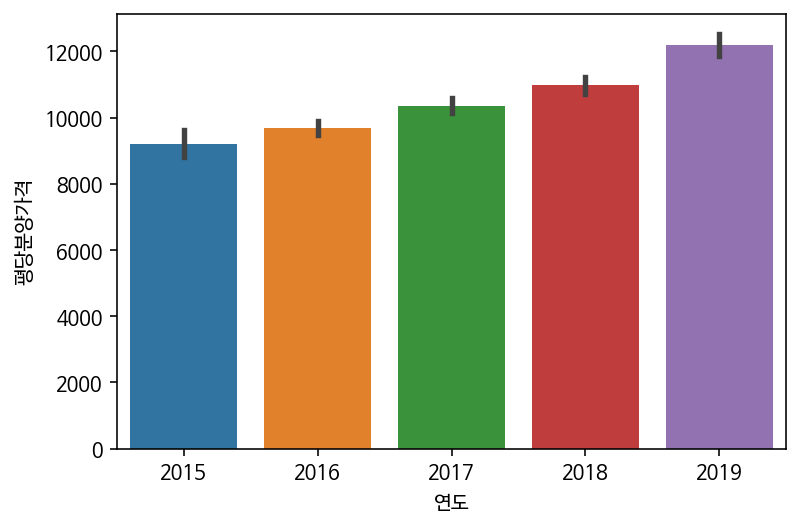

In [ ]:
#연도별 평당분양가격 barplot
sns.barplot(data = df_last, x = "연도", y = "평당분양가격")

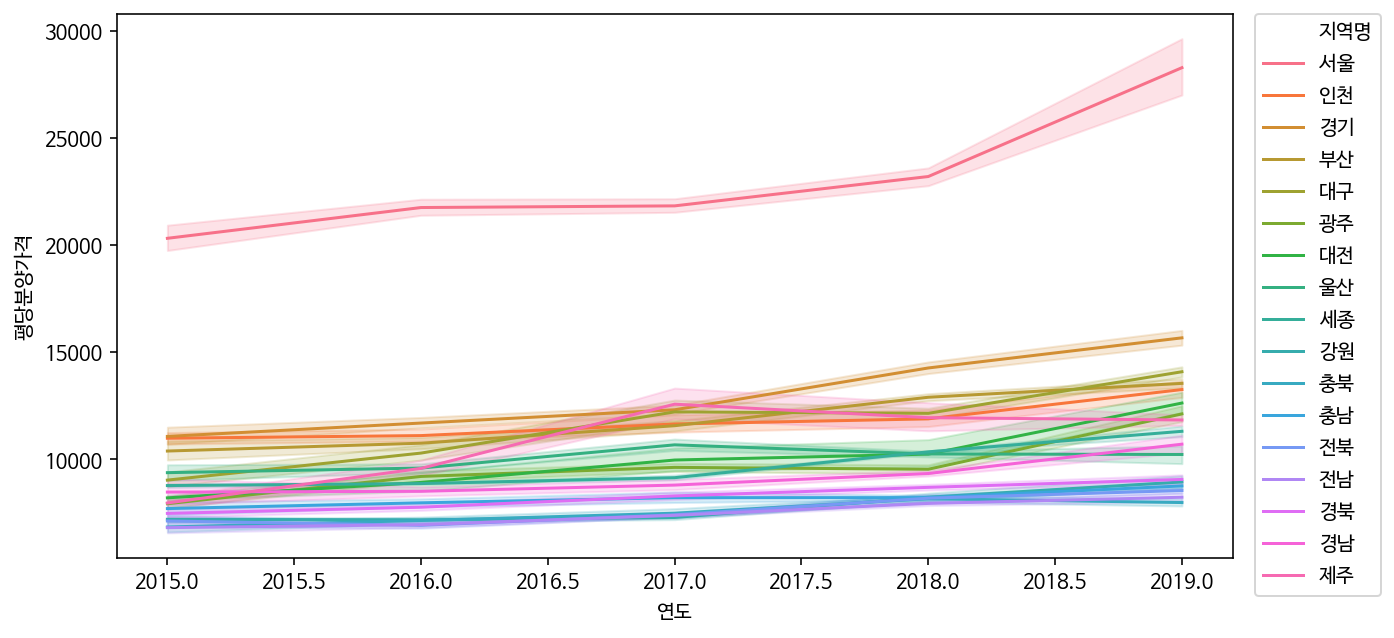

In [ ]:
 연도", y = "평당분양가격", hue = "지역명")

#그래프 밖에 legend(범주) 표시하도록 설정
#loc: legend 위치(2는 upper left 의미)
#bbox_to_anchor: legend 위치를 정확하게 설정 가능
#borderaxespad: legend 여백 설정
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0) 

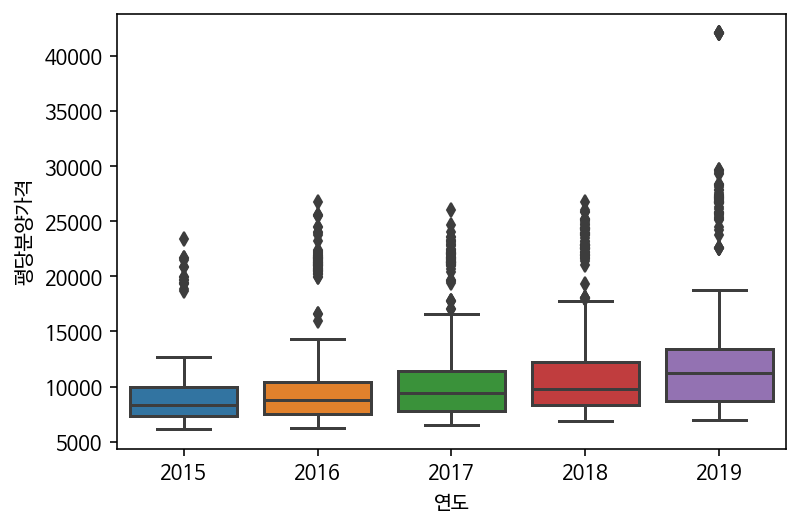

In [ ]:
#연도별 평당분양가격 baxplot
#최솟값
#제 1사분위수
#제 2사분위수 = 중앙값
#제 3사분위수
#최댓값

sns.boxplot(data = df_last, x = "연도", y = "평당분양가격")

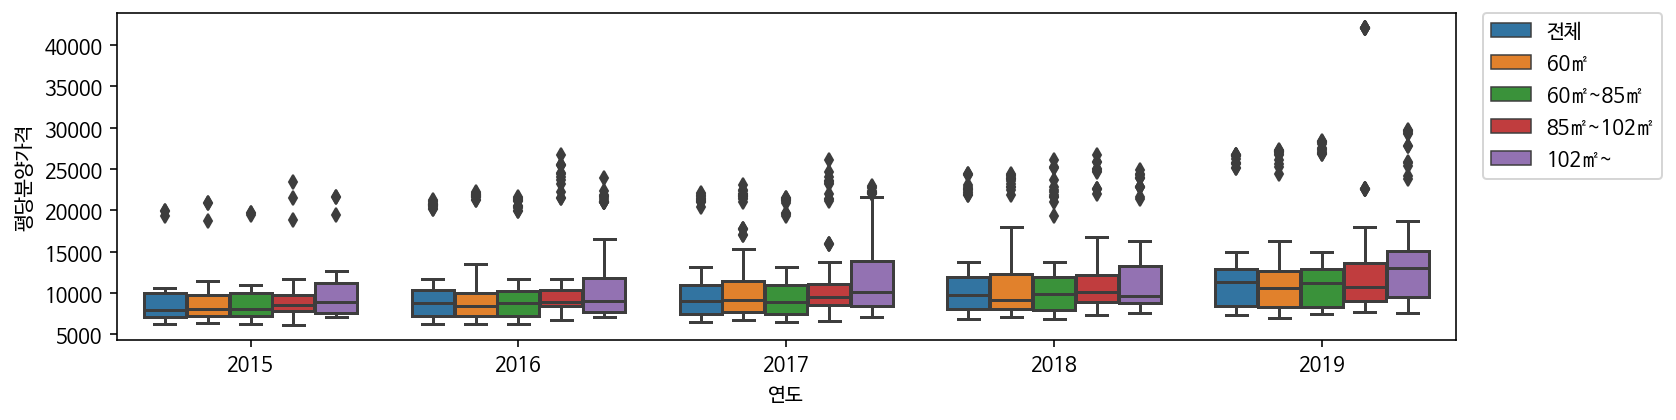

In [ ]:
#hue 옵션 사용: 전용면적별로 다르게 표시
#집단별로 묶어서 세부 정보를 시각화
plt.figure(figsize = (12, 3))
sns.boxplot(data = df_last, x = "연도", y = "평당분양가격", hue = "전용면적")
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0) 

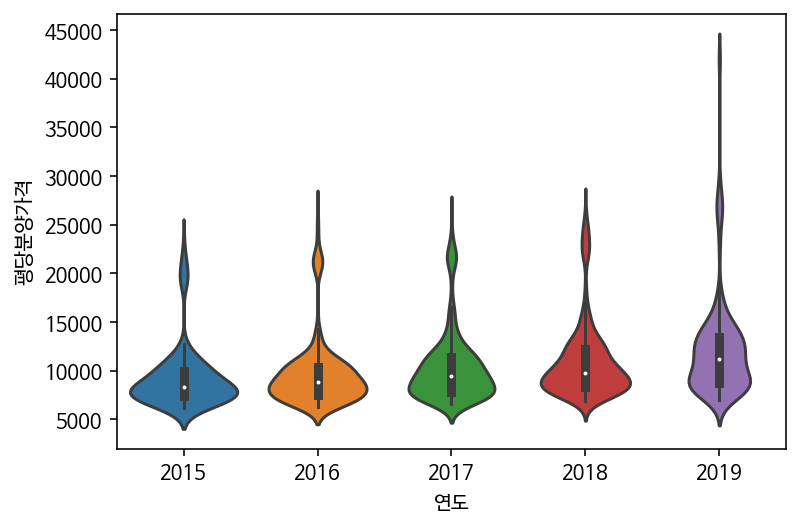

In [ ]:
#연도별 평당분양가격 violinplot
#중심선을 따라 대칭인 KDE 플롯
#가운데 흰색 점은 중앙값(median)
#바이올린 중앙의 두꺼운 선은 사분위 범위
#바이올린 중앙의 얇은 선은 95% 신뢰 구간
sns.violinplot(data = df_last, x = "연도", y = "평당분양가격")